In [1]:
!pip install xlsxwriter

     |████████████████████████████████| 153kB 5.2MB/s 


In [2]:
# Necessary Imports
import os
import os.path
import urllib
from urllib import request
import numpy as np
import pandas as pd
import xlsxwriter
from matplotlib import pyplot as plt
from statistics import mean, median

In [3]:
# Download Data Files if Not Currently Downloaded into the Current Working Directory
DOWNLOAD_DIR = "/content/"

# Set Needed File Names
needed_files = ["nba odds 2007-08.xlsx", "nba odds 2008-09.xlsx",
                "nba odds 2009-10.xlsx", "nba odds 2010-11.xlsx",
                "nba odds 2011-12.xlsx", "nba odds 2012-13.xlsx",
                "nba odds 2013-14.xlsx", "nba odds 2014-15.xlsx",
                "nba odds 2015-16.xlsx", "nba odds 2016-17.xlsx",
                "nba odds 2017-18.xlsx", "nba odds 2018-19.xlsx",
                "nba odds 2019-20.xlsx", "nba odds 2020-21.xlsx"]

# Remove Space from Needed File Names
file_urls = []
for filename in needed_files:
  file_urls.append(filename.replace(' ', '%20'))
  
# Create Season Data List
season_data = []

# Read and Download Needed Files
for i in range(len(needed_files)):
    if not os.path.isfile(DOWNLOAD_DIR + needed_files[i]):
      DOWNLOAD_ROOT = "https://raw.githubusercontent.com/LMastro99/Sports-Betting-Module/main/season-data/raw-data/"
      url = DOWNLOAD_ROOT + file_urls[i]
      urllib.request.urlretrieve(url, DOWNLOAD_DIR + needed_files[i])
    print("Downloaded", needed_files[i])    

    # Create Dataframe "Layers" with the Data From the XLSX Files
    download = pd.read_excel(DOWNLOAD_DIR + needed_files[i])
    season_data.append(download)

# Convert Season Data to Numpy Array of DataFrames
season_data = np.array(season_data, dtype = 'object')

Downloaded nba odds 2007-08.xlsx
Downloaded nba odds 2008-09.xlsx
Downloaded nba odds 2009-10.xlsx
Downloaded nba odds 2010-11.xlsx
Downloaded nba odds 2011-12.xlsx
Downloaded nba odds 2012-13.xlsx
Downloaded nba odds 2013-14.xlsx
Downloaded nba odds 2014-15.xlsx
Downloaded nba odds 2015-16.xlsx
Downloaded nba odds 2016-17.xlsx
Downloaded nba odds 2017-18.xlsx
Downloaded nba odds 2018-19.xlsx
Downloaded nba odds 2019-20.xlsx
Downloaded nba odds 2020-21.xlsx


In [4]:
# Correct Date Column
for i in range(len(season_data)):
  season_data[i]['Date'] = season_data[i]['Date'].astype('object')
  ymod = 1
  for r in range(len(season_data[i])):
    date = season_data[i]['Date'][r]
    month = str (date // 100)
    day = str (date % 100)
    if (month == '1' and int (day) >= 1):
      ymod = 0
    year = str (2000 + int (needed_files[i][-7:-5]) - ymod)
    date = month + '/' + day + '/' + year
    season_data[i]['Date'][r] = date
  season_data[i]['Date'] = pd.to_datetime(season_data[i]['Date'], format = '%m/%d/%Y')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [5]:
# View All Season Data Info
for s in range(len(season_data)):
  print(needed_files[s])
  print(season_data[s].info())
  print()

nba odds 2007-08.xlsx
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2632 entries, 0 to 2631
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2632 non-null   datetime64[ns]
 1   Rot     2632 non-null   int64         
 2   VH      2632 non-null   object        
 3   Team    2632 non-null   object        
 4   1st     2632 non-null   int64         
 5   2nd     2632 non-null   int64         
 6   3rd     2632 non-null   int64         
 7   4th     2632 non-null   int64         
 8   Final   2632 non-null   int64         
 9   Open    2632 non-null   object        
 10  Close   2632 non-null   object        
 11  ML      2632 non-null   object        
 12  2H      2632 non-null   object        
dtypes: datetime64[ns](1), int64(6), object(6)
memory usage: 267.4+ KB
None

nba odds 2008-09.xlsx
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2630 entries, 0 to 2629
Data columns (total 13 columns):
 #   

In [6]:
# Drop ['Rot'], ['Open'], and ['2H'] Columns from each Season's Data
for s in range(len(season_data)):
  season_data[s].drop(columns = ['Rot', 'Open', 'Close', '2H'], inplace = True)

In [7]:
# Rename ['VH'] to ['Home'] for each Season
for s in range(len(season_data)):
  season_data[s].rename(columns = {'VH' : 'Home'}, inplace = True)

In [8]:
# View All Season Data Info
for s in range(len(season_data)):
  print(needed_files[s])
  print(season_data[s].info())
  print()

nba odds 2007-08.xlsx
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2632 entries, 0 to 2631
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2632 non-null   datetime64[ns]
 1   Home    2632 non-null   object        
 2   Team    2632 non-null   object        
 3   1st     2632 non-null   int64         
 4   2nd     2632 non-null   int64         
 5   3rd     2632 non-null   int64         
 6   4th     2632 non-null   int64         
 7   Final   2632 non-null   int64         
 8   ML      2632 non-null   object        
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 185.2+ KB
None

nba odds 2008-09.xlsx
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2630 entries, 0 to 2629
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2630 non-null   datetime64[ns]
 1   Home    2630 non-null   object        
 2   Te

In [9]:
# Note Incorrect Data Types ['ML'] != int64
print(season_data[0].dtypes, '\n\n' + 'ML\t\t ' + str (season_data[0].dtypes['ML']) + '\n')
print(season_data[2].dtypes, '\n\n' + 'ML\t\t' + str (season_data[2].dtypes['ML']))

Date     datetime64[ns]
Home             object
Team             object
1st               int64
2nd               int64
3rd               int64
4th               int64
Final             int64
ML               object
dtype: object 

ML		 object

Date     datetime64[ns]
Home             object
Team             object
1st               int64
2nd               int64
3rd               int64
4th               int64
Final             int64
ML              float64
dtype: object 

ML		float64


In [10]:
# Show Error Games [Pt. 1]
current_season = season_data[0]
current_season[current_season['ML']  == 'NL']

,Date,Home,Team,1st,2nd,3rd,4th,Final,ML
2184,2008-03-30,V,Miami,13,17,18,14,62,NL
2185,2008-03-30,H,Boston,32,18,18,20,88,NL


In [11]:
# Show Error Games [Pt. 2]
current_season = season_data[2]
current_season[current_season['ML'] % 1 != 0]
current_season.loc[142:143]

,Date,Home,Team,1st,2nd,3rd,4th,Final,ML
142,2009-11-06,V,Atlanta,24,24,21,14,83,-7.5
143,2009-11-06,H,Charlotte,28,33,23,19,103,120.0


In [12]:
# Show +120 ML Games from Error Season
ml_120 = list (season_data[2][season_data[2]['ML'] == 120].index)
ml_120_df = season_data[2][season_data[2]['ML'] == 120]
opposing_team = []
for r in ml_120:
  if (ml_120_df['Home'][r] == 'V'):
    opposing_team.append(season_data[2].loc[r + 1])
  else:
    opposing_team.append(season_data[2].loc[r - 1])
ml_120_df.head()

,Date,Home,Team,1st,2nd,3rd,4th,Final,ML
51,2009-10-30,H,Memphis,23,30,23,39,115,120.0
67,2009-10-31,H,NewYork,25,26,30,41,127,120.0
143,2009-11-06,H,Charlotte,28,33,23,19,103,120.0
154,2009-11-06,V,Milwaukee,16,17,31,23,87,120.0
311,2009-11-17,H,Sacramento,23,24,25,15,87,120.0


In [13]:
# Show Opposing ML for +120 Games from Error Season
pd.DataFrame(opposing_team).head()

,Date,Home,Team,1st,2nd,3rd,4th,Final,ML
50,2009-10-30,V,Toronto,22,27,30,28,107,-140.0
66,2009-10-31,V,Philadelphia,40,30,26,26,141,-140.0
142,2009-11-06,V,Atlanta,24,24,21,14,83,-7.5
155,2009-11-06,H,Minnesota,24,14,14,20,72,-140.0
310,2009-11-17,V,Chicago,27,34,25,15,101,-140.0


In [14]:
# Show Error Games [Pt. 3]
season_data[1][1028:1030]

,Date,Home,Team,1st,2nd,3rd,4th,Final,ML
1028,2009-01-07,V,Orlando,102,-42,26,20,106,120
1029,2009-01-07,H,Atlanta,99,-54,25,32,102,-140


In [15]:
# Show Error Games [Pt. 3 continued]
season_data[2][1112:1114]

,Date,Home,Team,1st,2nd,3rd,4th,Final,ML
1112,2010-01-12,V,Orlando,53,-2,25,33,109,-180.0
1113,2010-01-12,H,Sacramento,58,-3,23,10,88,160.0


In [16]:
# Drop Incorrect Games to a Separate DataFrame "Layer"
incorrect_games_list = []
for s in range(len(season_data)):
  current_season = season_data[s]
  if (s == 0):
    incorrect_games = current_season[current_season['ML'] == 'NL']
  elif (s == 1):
    incorrect_games = current_season[current_season['2nd'] < 0]
  elif (s == 2):
    a = current_season[142:144]
    b = current_season[1112:1114]
    c = a.append(b)
    incorrect_games = c
  else:
    incorrect_games = current_season[current_season['ML'] % 1 != 0]
  num_incorrect_games = len(incorrect_games)
  if (num_incorrect_games > 0):
    season_data[s] = current_season.append(incorrect_games).drop_duplicates(keep=False)
  incorrect_games_list.append(incorrect_games)

In [17]:
# Export Incorrect Games Data
writer = pd.ExcelWriter('incorrect games.xlsx', engine='xlsxwriter')
for i in range(len(incorrect_games_list)):
  if (i < 2):
    year = str (2007 + i) + '-0' + str (8 + i) 
  else: 
    year = str (2007 + i) + '-' + str (8 + i)
  incorrect_games_list[i].to_excel(writer, sheet_name = year)
writer.save()

In [18]:
# Correct Error Games [Pt. 1]
season_data[0]['ML'][2184] = 2500
season_data[0]['ML'][2185] = -5000

In [19]:
# Correct Scores [Pt. 1]
season_data[1]['1st'][1028] = 29
season_data[1]['2nd'][1028] = 31

season_data[1]['1st'][1029] = 24
season_data[1]['2nd'][1029] = 21

In [20]:
# Correct Scores [Pt. 2]
season_data[2]['1st'][1112] = 24
season_data[2]['2nd'][1112] = 27

season_data[2]['1st'][1113] = 24
season_data[2]['2nd'][1113] = 31

In [21]:
# Correct Error Games [Pt. 2]
season_data[2]['ML'][142] = -140

In [22]:
# Correct Types
for i in [0, 2]:
  season_data[i]['ML'] = season_data[i]['ML'].astype('int64')

In [23]:
# Drop Neutral Games to a Separate DataFrame "Layer"
neutral_games_list = []
for s in range(len(season_data)):
  current_season = season_data[s]
  neutral_games = pd.DataFrame(current_season[current_season['Home'] == 'N'])
  num_neutral_games = len(pd.DataFrame(neutral_games))
  if (num_neutral_games > 0):
    season_data[s] = current_season.append(neutral_games).drop_duplicates(keep=False)
  neutral_games_list.append(neutral_games)

In [24]:
# Create ['Season'] Column
for s in range(len(season_data)):
  current_season = season_data[s]
  current_season['Season'] = current_season['Team']
  if (s < 2):
    year = str (2007 + s) + '-0' + str (8 + s) 
  else: 
    year = str (2007 + s) + '-' + str (8 + s)
  for r in range(current_season.iloc[-1:].index.values[0] + 1):
    current_season['Season'][r] = year
  reordered = [list (current_season.columns)[-1]]
  for i in range(len(current_season.columns) - 1):
    reordered.append(list (current_season.columns)[i])
  current_season = current_season.reindex(columns = reordered)
  season_data[s] = current_season

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [25]:
# Export Neutral Games Data
writer = pd.ExcelWriter('neutral games.xlsx', engine='xlsxwriter')
for n in range(len(neutral_games_list)):
  if (n < 2):
    year = str (2007 + n) + '-0' + str (8 + n) 
  else: 
    year = str (2007 + n) + '-' + str (8 + n)
  neutral_games_list[n].to_excel(writer, sheet_name = year)
writer.save()

In [26]:
# Export Home-Away Games Data
writer = pd.ExcelWriter('home-away games.xlsx', engine='xlsxwriter')
for s in range(len(season_data)):
  if (s < 2):
    year = str (2007 + s) + '-0' + str (8 + s) 
  else: 
    year = str (2007 + s) + '-' + str (8 + s)
  season_data[s].to_excel(writer, sheet_name = year)
writer.save()

In [27]:
# View All Season Data Info
for s in range(len(season_data)):
  print(needed_files[s])
  print(season_data[s].info())
  print()

nba odds 2007-08.xlsx
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2630 entries, 0 to 2631
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Season  2630 non-null   object        
 1   Date    2630 non-null   datetime64[ns]
 2   Home    2630 non-null   object        
 3   Team    2630 non-null   object        
 4   1st     2630 non-null   int64         
 5   2nd     2630 non-null   int64         
 6   3rd     2630 non-null   int64         
 7   4th     2630 non-null   int64         
 8   Final   2630 non-null   int64         
 9   ML      2630 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 306.0+ KB
None

nba odds 2008-09.xlsx
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2628 entries, 0 to 2629
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Season  2628 non-null   object        
 1   

In [28]:
# Describe Each Column
x = []
col_max, col_min, col_med, final_max, final_min, final_med = [], [], [], [], [], []
for s in range(len(season_data)):
  current_season = season_data[s]
  columns = current_season.columns
  c_max, c_min, c_med, f_max, f_min, f_med = [], [], [], [], [], []
  year = 0
  labels = []
  for c in range(4, len(columns)):
    if (s < 2):
      year = str (2007 + s) + '-0' + str (8 + s) 
    else: 
      year = str (2007 + s) + '-' + str (8 + s)
    c_max.append(current_season[columns[c]].max())
    c_min.append(current_season[columns[c]].min())
    c_med.append(median(current_season[columns[c]]))
    f_max.append(current_season[columns[-2]].max())
    f_min.append(current_season[columns[-2]].min())
    f_med.append(median(current_season[columns[-2]]))
    labels.append(columns[c])
  x.append(year)
  col_max.append(c_max)
  col_min.append(c_min)
  col_med.append(c_med)
  final_max.append(f_max)
  final_min.append(f_min)
  final_med.append(f_med)
x = np.array(x)
col_max = np.array(col_max)
col_min = np.array(col_min)
col_med = np.array(col_med)
final_max = np.array(final_max)
final_min = np.array(final_min)
final_med = np.array(final_med)

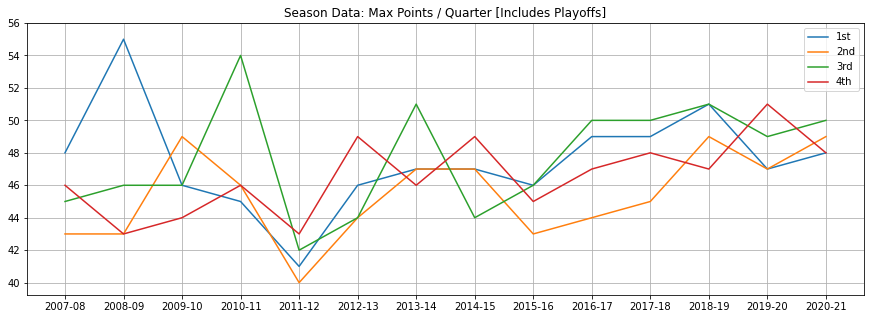

In [29]:
# Plot 'Season Data: Max Points / Quarter [Includes Playoffs]'
plt.figure(figsize = (15, 5))
plt.title('Season Data: Max Points / Quarter [Includes Playoffs]')
plt.plot(x, col_max[:, :-2])
plt.yticks(np.arange(40, 57, step = 2))
plt.legend(labels = labels)
plt.grid(True)
plt.savefig('')

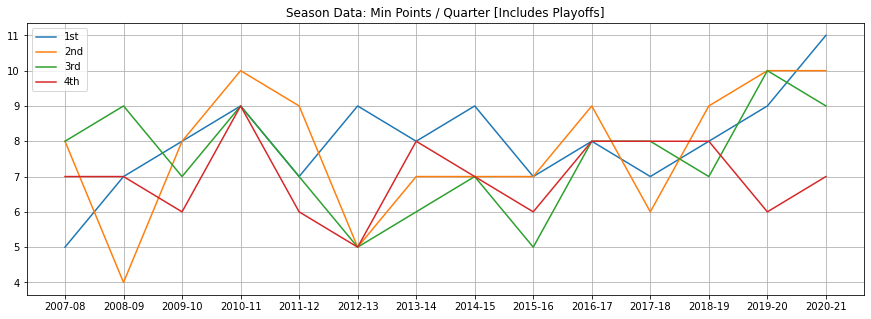

In [30]:
# 'Season Data: Min Points / Quarter [Includes Playoffs]'
plt.figure(figsize = (15, 5))
plt.title('Season Data: Min Points / Quarter [Includes Playoffs]')
plt.plot(x, col_min[:, :-2])
plt.yticks(np.arange(4, 12, step = 1))
plt.legend(labels = labels)
plt.grid(True)

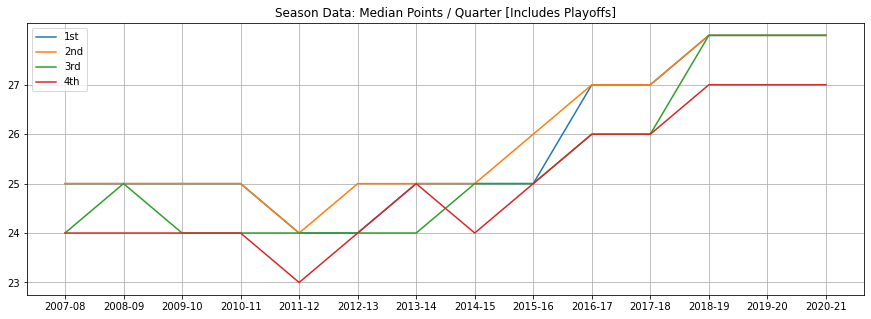

In [31]:
# Plot 'Season Data: Median Points / Quarter [Includes Playoffs]'
plt.figure(figsize = (15, 5))
plt.title('Season Data: Median Points / Quarter [Includes Playoffs]')
plt.plot(x, col_med[:, :-2])
plt.yticks(np.arange(23, 28, step = 1))
plt.legend(labels = labels)
plt.grid(True)

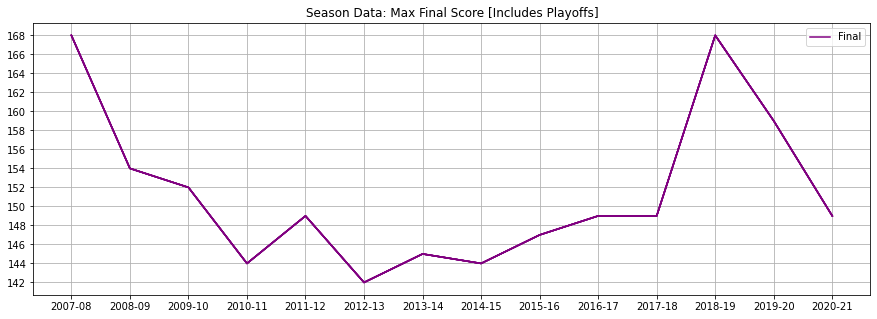

In [32]:
# Plot 'Season Data: Max Final Score [Includes Playoffs]'
plt.figure(figsize = (15, 5))
plt.title('Season Data: Max Final Score [Includes Playoffs]')
plt.plot(x, final_max, c = 'purple')
plt.yticks(np.arange(142, 170, step = 2))
plt.legend(labels = [labels[-2]])
plt.grid(True)

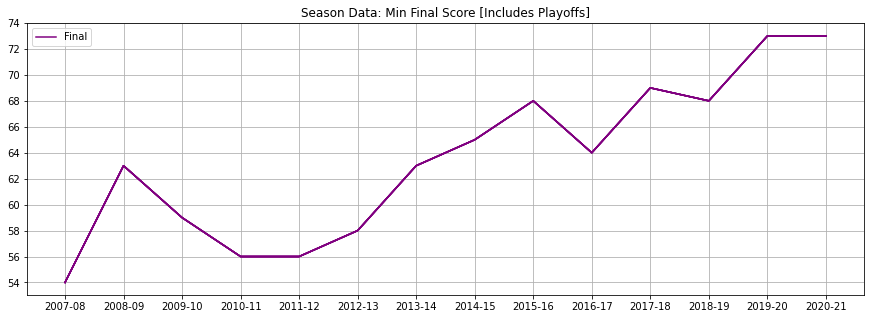

In [33]:
# Plot 'Season Data: Min Final Score [Includes Playoffs]'
plt.figure(figsize = (15, 5))
plt.title('Season Data: Min Final Score [Includes Playoffs]')
plt.plot(x, final_min, c = 'purple')
plt.yticks(np.arange(54, 75, step = 2))
plt.legend(labels = [labels[-2]])
plt.grid(True)

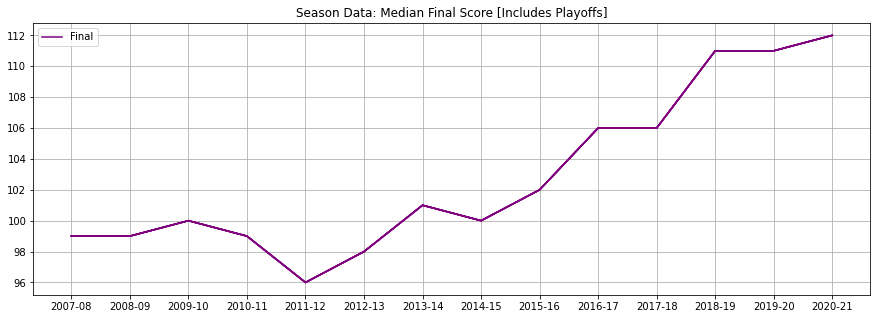

In [34]:
# Plot 'Season Data: Median Final Score [Includes Playoffs]'
plt.figure(figsize = (15, 5))
plt.title('Season Data: Median Final Score [Includes Playoffs]')
plt.plot(x, final_med, c = 'purple')
plt.yticks(np.arange(96, 114, step = 2))
plt.legend(labels = [labels[-2]])
plt.grid(True)

In [35]:
# Function to Create Matchups DataFrame (Also Returns Home and Away DataFrames)
def create_matchups(df):
  away = []
  home = []
  indices = list (df.index)
  stop = np.arange(0, len(indices) - 1, step = 2)
  for r in stop:
    away.append(df.loc[indices[r]])
    home.append(df.loc[indices[r + 1]])
  away = pd.DataFrame(away)
  home = pd.DataFrame(home)
  matchup = []
  away_indices = list (away.index)
  home_indices = list (home.index)
  for i in range(len(away_indices)):
    a = away.loc[away_indices[i]]
    b = home.loc[home_indices[i]]
    c = np.hstack((a, b))
    game = pd.DataFrame([c])
    matchup.append(game)
  away_col = np.array(list (away.columns))
  home_col = np.array(list (home.columns))
  matchup_col = list (np.hstack((away_col, home_col)))
  for i in range(2, len(matchup_col)):
    if (i < len(matchup_col) / 2):
      matchup_col[i] = 'Away ' + matchup_col[i]
    else:
      matchup_col[i] = 'Home ' + matchup_col[i]
  matchup = np.array(matchup)
  matchup = np.reshape(matchup, (matchup.shape[0], matchup.shape[2]))
  matchup = pd.DataFrame(matchup)
  matchup.columns = matchup_col
  matchup = matchup.drop(columns = ['Home Season', 'Home Date'])
  
  return (home, away, matchup)

In [36]:
# Create Home, Away, and Matchup DataFrames
home_games_list = []
away_games_list = []
matchup_list = []
for s in range(len(season_data)):
  current_season = season_data[s]
  home_games, away_games, matchup = create_matchups(current_season)
  home_games_list.append(home_games)
  away_games_list.append(away_games)
  matchup_list.append(matchup)

In [37]:
# Adjust Matchup DataFrame
for s in range(len(season_data)):
  current_season = matchup_list[s]
  current_season['Home Favorite'] = current_season['Home Final']
  current_season['Differential'] = current_season['Home Final']
  for r in range(len(current_season)):
    home_final = current_season['Home Final'][r]
    away_final = current_season['Away Final'][r]
    if (current_season['Away ML'][r] > current_season['Home ML'][r]):
      current_season['Home Favorite'][r] = 1
      current_season['Differential'][r] = home_final - away_final
    else:
      current_season['Home Favorite'][r] = 0
      current_season['Differential'][r] = away_final - home_final
  current_season = current_season.drop(columns = ['Away Home', 'Home Home'])
  matchup_list[s] = current_season

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [38]:
# Correct Types
a = np.arange(3, 9)
b = np.arange(10, 18)
c = np.hstack((a, b))
columns = c
for s in range(len(matchup_list)):
  current_season = matchup_list[s]
  for c in columns:
    cols = list (current_season.columns)
    current_season[cols[c]] = current_season[cols[c]].astype('int64')
  matchup_list[s] = current_season

In [39]:
# Export Home Games Data
writer = pd.ExcelWriter('home games.xlsx', engine='xlsxwriter')
for h in range(len(home_games_list)):
  if (h < 2):
    year = str (2007 + h) + '-0' + str (8 + h) 
  else: 
    year = str (2007 + h) + '-' + str (8 + h)
  neutral_games_list[h].to_excel(writer, sheet_name = year)
writer.save()

In [40]:
# Export Away Games Data
writer = pd.ExcelWriter('away games.xlsx', engine='xlsxwriter')
for a in range(len(away_games_list)):
  if (a < 2):
    year = str (2007 + a) + '-0' + str (8 + a) 
  else: 
    year = str (2007 + a) + '-' + str (8 + a)
  away_games_list[a].to_excel(writer, sheet_name = year)
writer.save()

In [41]:
# Export Matchups Data
writer = pd.ExcelWriter('matchups.xlsx', engine='xlsxwriter')
for m in range(len(matchup_list)):
  if (m < 2):
    year = str (2007 + m) + '-0' + str (8 + m) 
  else: 
    year = str (2007 + m) + '-' + str (8 + m)
  matchup_list[m].to_excel(writer, sheet_name = year)
writer.save()

In [42]:
# View All Matchup Info
for s in range(len(matchup_list)):
  print(needed_files[s])
  print(matchup_list[s].info())
  print()

nba odds 2007-08.xlsx
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1315 entries, 0 to 1314
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Season         1315 non-null   object        
 1   Date           1315 non-null   datetime64[ns]
 2   Away Team      1315 non-null   object        
 3   Away 1st       1315 non-null   int64         
 4   Away 2nd       1315 non-null   int64         
 5   Away 3rd       1315 non-null   int64         
 6   Away 4th       1315 non-null   int64         
 7   Away Final     1315 non-null   int64         
 8   Away ML        1315 non-null   int64         
 9   Home Team      1315 non-null   object        
 10  Home 1st       1315 non-null   int64         
 11  Home 2nd       1315 non-null   int64         
 12  Home 3rd       1315 non-null   int64         
 13  Home 4th       1315 non-null   int64         
 14  Home Final     1315 non-null   int64         
 15 